# SMS Spam Ham Classifier:  Naive Bayes

The notebook is divided into the following sections:
1. Importing and preprocessing data
2. Building the model: Multinomial Naive Bayes and Bernoulli Naive Bayes
    - Model building 
    - Model evaluation
---

# Importing and preprocessing the data 

In [1]:
# import libraries 
import warnings 
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# import and read the dataset 
docs = pd.read_table('SMSSpamCollection', delimiter = '\t', header = None , names = ['Class','SMS'])
docs.head()

,Class,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
# check the length of the dataframe 
len(docs)

5572

In [5]:
# quick statistical summary of two cols 
docs.describe()

,Class,SMS
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [6]:
# check total number of hams and spams in the class label
ham_spam = docs.Class.value_counts()
ham_spam

Class
ham     4825
spam     747
Name: count, dtype: int64

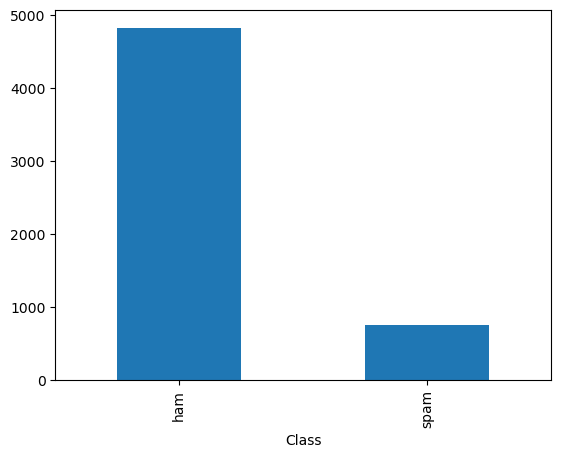

In [7]:
# display the value counts 
display_class = docs.Class.value_counts().plot(kind='bar')
plt.show()

In [8]:
# check the spam rate 
spam_rate = round((ham_spam[1]/(ham_spam[0]+ham_spam[1]))*100,2)
print(f'The spam rate is : {spam_rate}%')

The spam rate is : 13.41%


In [9]:
# now create a new column and map class labels as 1s and 0s 
docs['Class_labels'] = docs.Class.map({'spam':1 , 'ham':0})
docs.head()

,Class,SMS,Class_labels
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [10]:
# drop the class column
docs = docs.drop('Class', axis = 1)
docs.head()

,SMS,Class_labels
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [11]:
# divide the data into input and target features
X = docs.SMS
y = docs.Class_labels

# print the shape 
print(X.shape)
print(y.shape)

(5572,)
(5572,)


In [12]:
# split the data into train and test set 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y , train_size = 0.70 , random_state = 50)
X_train.head()

2696    And whenever you and i see we can still hook u...
1659    RGENT! This is the 2nd attempt to contact U!U ...
4829    Lol no. Just trying to make your day a little ...
5319                         Kothi print out marandratha.
1394                                              Oh ok..
Name: SMS, dtype: object

In [13]:
y_train.head()

2696    0
1659    1
4829    0
5319    0
1394    0
Name: Class_labels, dtype: int64

In [14]:
# fit the vectorizer on the training data 
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(stop_words = 'english').fit(X_train)

In [15]:
vect.vocabulary_

{'hook': 3140,
 'rgent': 5184,
 '2nd': 373,
 'attempt': 1028,
 'contact': 1804,
 'won': 6763,
 '1250': 265,
 '09071512433': 224,
 'b4': 1079,
 '050703': 15,
 'csbcm4235wc1n3xx': 1910,
 'callcost': 1457,
 '150ppm': 288,
 'mobilesvary': 4094,
 'max': 3959,
 '50': 499,
 'lol': 3771,
 'just': 3484,
 'trying': 6322,
 'make': 3905,
 'day': 1992,
 'little': 3738,
 'interesting': 3338,
 'kothi': 3571,
 'print': 4863,
 'marandratha': 3922,
 'oh': 4412,
 'ok': 4417,
 'babe': 1084,
 'need': 4258,
 'advice': 778,
 'maybe': 3964,
 'reboot': 5038,
 'ym': 6876,
 'seen': 5380,
 'buzz': 1436,
 'hurt': 3209,
 'tease': 6052,
 'end': 2345,
 'life': 3689,
 'die': 2106,
 'plz': 4722,
 'rose': 5232,
 'grave': 2914,
 'say': 5324,
 'stupid': 5881,
 'miss': 4060,
 'nice': 4296,
 'bslvyl': 1390,
 'yeah': 6860,
 'pretty': 4851,
 'best': 1201,
 'case': 1516,
 'scenario': 5333,
 'smith': 5622,
 'waste': 6614,
 'da': 1954,
 'wanna': 6598,
 'gayle': 2790,
 'huh': 3195,
 'thk': 6145,
 'oredi': 4471,
 'pages': 4525,
 '

In [16]:
len(vect.vocabulary_.keys())

6912

In [17]:
# transform the training set and testing set 
X_train_transform = vect.transform(X_train)
X_test_transform = vect.transform(X_test)

In [18]:
# printing the transformed training set 
print(X_train_transform)

  (0, 3140)	1
  (1, 15)	1
  (1, 224)	1
  (1, 265)	1
  (1, 288)	1
  (1, 373)	1
  (1, 499)	1
  (1, 1028)	1
  (1, 1079)	1
  (1, 1457)	1
  (1, 1804)	1
  (1, 1910)	1
  (1, 3959)	1
  (1, 4094)	1
  (1, 5184)	1
  (1, 6763)	1
  (2, 1992)	1
  (2, 3338)	1
  (2, 3484)	1
  (2, 3738)	1
  (2, 3771)	1
  (2, 3905)	1
  (2, 6322)	1
  (3, 3571)	1
  (3, 3922)	1
  :	:
  (3896, 3058)	1
  (3896, 3838)	1
  (3896, 3912)	1
  (3896, 4119)	1
  (3896, 5320)	1
  (3896, 6571)	1
  (3897, 726)	1
  (3897, 2003)	1
  (3897, 4717)	1
  (3897, 6208)	1
  (3898, 52)	1
  (3898, 240)	1
  (3898, 319)	1
  (3898, 1517)	1
  (3898, 1658)	1
  (3898, 2701)	1
  (3898, 2830)	1
  (3898, 2917)	1
  (3898, 2941)	1
  (3898, 3739)	1
  (3898, 4289)	1
  (3898, 4451)	1
  (3898, 5706)	1
  (3899, 1511)	1
  (3899, 2156)	1


In [19]:
# print type of transformed training data 
print(type(X_train_transform))

<class 'scipy.sparse._csr.csr_matrix'>


# Building the model 

In [20]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB().fit(X_train_transform , y_train)

# predict class labels 
y_test_pred_class = MNB.predict(X_test_transform)

# predict probabilities for each class
y_test_pred_probs = MNB.predict_proba(X_test_transform) 

In [21]:
# note that alpha=1 is used by default for smoothing
print(MNB.alpha)
print(MNB.class_prior)
print(MNB.fit_prior)

1.0
None
True


In [22]:
print(f'The predicted class labels: {y_test_pred_class}')

The predicted class labels: [1 0 0 ... 0 0 1]


In [23]:
print(f'The predicted probabilities: {y_test_pred_probs}')

The predicted probabilities: [[2.30765770e-14 1.00000000e+00]
 [9.04328730e-01 9.56712701e-02]
 [9.36686372e-01 6.33136280e-02]
 ...
 [8.69310604e-01 1.30689396e-01]
 [8.95663764e-01 1.04336236e-01]
 [3.70810664e-06 9.99996292e-01]]


# Model evaluation

In [24]:
# import required modules
from sklearn.metrics import accuracy_score, confusion_matrix , precision_score , recall_score, f1_score, ConfusionMatrixDisplay

In [25]:
# accuracy score of the model 
acc_score = accuracy_score(y_test, y_test_pred_class)
print(f'The accuracy score of the model is: {acc_score}')

The accuracy score of the model is: 0.9850478468899522


In [26]:
# print the consfusion matrix 
cm = confusion_matrix(y_test, y_test_pred_class)
cm # rows = actual (y_test) , columns = predicted (y_test_pred_class)

array([[1459,   10],
       [  15,  188]], dtype=int64)

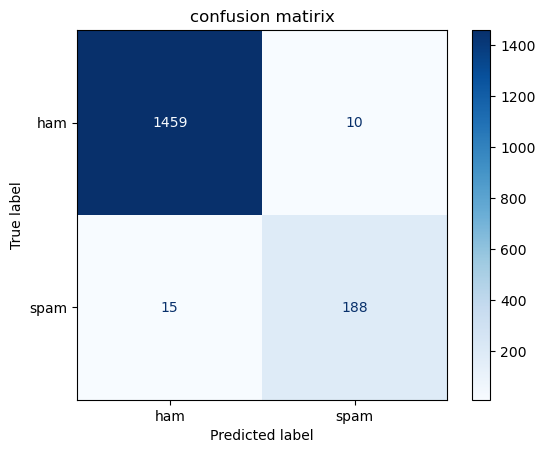

In [27]:
# display the confuion matrix 
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['ham','spam'])
disp.plot(cmap='Blues')
plt.title('confusion matirix')
plt.show()

In [28]:
# elements of confusion matric 
TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]

In [29]:
# sensitivity (how many spams are guessed correctly out of total spams)
sensitivity = TP/(TP+FN)
print(f'THE SENSITIVITY SCORE OF THE MODEL IS: {sensitivity} ')

THE SENSITIVITY SCORE OF THE MODEL IS: 0.9261083743842364 


In [30]:
# specificity  (how many hams are guessed correctly out of total hams)
specificity = TN/(TN+FP)
print(f'THE SPECIFICITY SCORE OF THE MODEL IS: {specificity} ')

THE SPECIFICITY SCORE OF THE MODEL IS: 0.9931926480599047 


In [31]:
# precision (how many spams are correctly predicted out of all predicited spams)
precision = TP/(TP+FP)
print(f'THE PRECISION SCORE OF THE MODEL IS: {precision} ')

THE PRECISION SCORE OF THE MODEL IS: 0.9494949494949495 


In [32]:
# print all the metrics together 
print(f'THE ACCURACY SCORE OF THE MODEL IS: {accuracy_score(y_test,y_test_pred_class)} \n')
print(f'THE SENSITIVITY SCORE OF THE MODEL IS: {sensitivity}\n ')
print(f'THE SPECIFICITY SCORE OF THE MODEL IS: {specificity} \n')
print(f'THE  RECALL SCORE OF THE MODEL IS: {recall_score(y_test,y_test_pred_class)} \n')
print(f'THE PRECISION SCORE OF THE MODEL IS: {precision_score(y_test,y_test_pred_class)}\n')
print(f'THE F1 SCORE OF THE MODEL IS:{f1_score(y_test,y_test_pred_class)}\n')

THE ACCURACY SCORE OF THE MODEL IS: 0.9850478468899522 

THE SENSITIVITY SCORE OF THE MODEL IS: 0.9261083743842364
 
THE SPECIFICITY SCORE OF THE MODEL IS: 0.9931926480599047 

THE  RECALL SCORE OF THE MODEL IS: 0.9261083743842364 

THE PRECISION SCORE OF THE MODEL IS: 0.9494949494949495

THE F1 SCORE OF THE MODEL IS:0.9376558603491272



In [33]:
# classification report 
from sklearn.metrics import classification_report 
cr = classification_report(y_test,y_test_pred_class)
print(cr) 

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1469
           1       0.95      0.93      0.94       203

    accuracy                           0.99      1672
   macro avg       0.97      0.96      0.96      1672
weighted avg       0.98      0.99      0.98      1672



In [34]:
# creating an ROC curve
from sklearn.metrics import roc_curve , auc , roc_auc_score 

#roc curve returns list of three elemts FPR , TPR , threshold 
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test , y_test_pred_probs[:,1])

roc_auc = auc(false_positive_rate, true_positive_rate)


In [35]:
# print the area under the curve 
print(f"The area under the curve is: {roc_auc}")

The area under the curve is: 0.981214391345609


In [36]:
# store the fpr , tpr and threshold into the dataframe
pd.DataFrame({'FPR': false_positive_rate,
              'TPR': true_positive_rate,
              'threshold' : threshold})

,FPR,TPR,threshold
0,0.000000,0.000000,inf
1,0.000000,0.266010,1.000000e+00
2,0.000000,0.300493,1.000000e+00
3,0.000000,0.320197,1.000000e+00
4,0.000000,0.344828,1.000000e+00
...,...,...,...
136,0.978897,1.000000,7.359570e-14
137,0.980259,1.000000,5.226091e-14
138,0.987066,1.000000,4.382725e-15
139,0.988428,1.000000,3.866414e-15


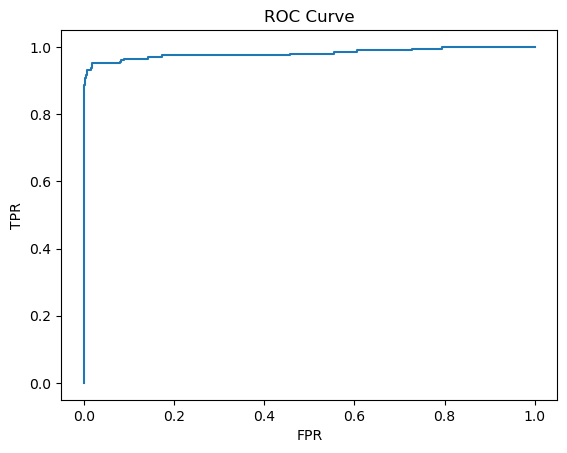

In [37]:
# plot the roc curve 
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.title('ROC Curve')
plt.plot(false_positive_rate, true_positive_rate)
plt.show()

<b>Conclusion:<br>
Evaluation Metrics:
Accuracy: 98.50%
→ Correctly classified 98.5% of all messages.<br>
Recall (Sensitivity/TPR): 92.61%
→ Detected 92.6% of actual spam messages.<br>
Specificity (TNR): 99.32%
→ Correctly identified 99.3% of legitimate (ham) messages.<br>
Precision: 94.95%
→ Of all messages predicted as spam, 94.95% were actually spam.<br>
F1 Score: 93.77%
→ Balanced measure of precision and recall.<br>

This Naive Bayes model is highly effective in distinguishing between spam and ham messages. With strong performance metrics and a near-perfect ROC curve, it's well-suited for real-world text classification tasks.

# Building Bernoulli Naive Bayes Model 

In [38]:
from sklearn.naive_bayes import BernoulliNB
# instantiate the object of the BernoulliNB class and fit the model on training data 
BNB = BernoulliNB().fit(X_train_transform,y_train)

# predict the class 
y_pred_class_bnb = BNB.predict(X_test_transform)

# predict probabilities for each class
y_pred_probs_bnb = BNB.predict_proba(X_test_transform)

# print class and probabilities 
print(f'THE PREDICTED CLASS IN BERNOULLIS NAIVE BAYES: {y_pred_class_bnb}')
print(f'THE PREDICTED PROBABILITY IN BERNOULLIS NAIVE BAYES: {y_pred_probs_bnb}')

THE PREDICTED CLASS IN BERNOULLIS NAIVE BAYES: [1 0 0 ... 0 0 1]
THE PREDICTED PROBABILITY IN BERNOULLIS NAIVE BAYES: [[3.09093101e-12 1.00000000e+00]
 [9.99999999e-01 1.34261284e-09]
 [9.99999992e-01 8.48244425e-09]
 ...
 [9.99999998e-01 1.92711250e-09]
 [9.99999986e-01 1.39736497e-08]
 [6.15471500e-05 9.99938453e-01]]


In [39]:
# accuracy score
print(f'ACCURACY SCORE: {accuracy_score(y_test,y_pred_class_bnb)}')

ACCURACY SCORE: 0.9760765550239234


In [40]:
# confusion matrix 
cm1 = confusion_matrix(y_test,y_pred_class_bnb)
print(cm)

[[1459   10]
 [  15  188]]


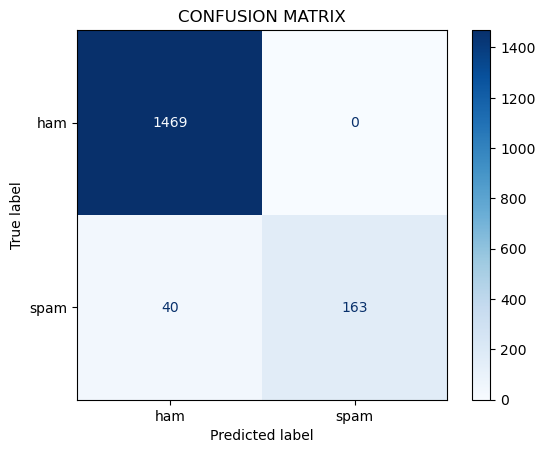

In [41]:
# display confusion matrix 
display1 = ConfusionMatrixDisplay(confusion_matrix = cm1 , display_labels= ['ham','spam']) 
display1.plot(cmap='Blues')
plt.title('CONFUSION MATRIX')
plt.show()

In [42]:
TP = cm1[1,1]
FP = cm1[0,1]
TN = cm1[0,0]
FN = cm1[1,0]

In [43]:
sen = TP/(TP+FN)
spec = TN/(TN+FP)

print(f'SENSITIVITY: {sen}')
print(f'SPECIFICITY: {spec}')

SENSITIVITY: 0.8029556650246306
SPECIFICITY: 1.0


In [44]:
# classification report 
cr_bnb = classification_report(y_test, y_pred_class_bnb)
print(cr_bnb)

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1469
           1       1.00      0.80      0.89       203

    accuracy                           0.98      1672
   macro avg       0.99      0.90      0.94      1672
weighted avg       0.98      0.98      0.97      1672



In [45]:
# precision 
prec = TP/(TP+FP)
print(f'PRECISION: {prec}')

PRECISION: 1.0


In [46]:
y_pred_probs_bnb

array([[3.09093101e-12, 1.00000000e+00],
       [9.99999999e-01, 1.34261284e-09],
       [9.99999992e-01, 8.48244425e-09],
       ...,
       [9.99999998e-01, 1.92711250e-09],
       [9.99999986e-01, 1.39736497e-08],
       [6.15471500e-05, 9.99938453e-01]])

In [47]:
# creating ROC curve for bernoulli naive bayes 
FPR , TPR , thresh = roc_curve(y_test, y_pred_probs_bnb[:,1])
auc_score_bnb = auc(FPR,TPR)

print(f'THE AUC(AREA UNDER THE CURVE) IN BERNOULLI IS: {auc_score_bnb}')
print(f'THE AUC(AREA UNDER THE CURVE) IN MULTINOMIAL IS: {roc_auc}')

THE AUC(AREA UNDER THE CURVE) IN BERNOULLI IS: 0.9911202620998165
THE AUC(AREA UNDER THE CURVE) IN MULTINOMIAL IS: 0.981214391345609


In [48]:
pd.DataFrame({'FPR':FPR,
             'TPR':TPR,
             'THRESHOLD':thresh})

,FPR,TPR,THRESHOLD
0,0.000000,0.000000,inf
1,0.000000,0.226601,1.000000e+00
2,0.000000,0.241379,1.000000e+00
3,0.000000,0.295567,1.000000e+00
4,0.000000,0.305419,1.000000e+00
...,...,...,...
137,0.947583,1.000000,2.615028e-13
138,0.948945,1.000000,2.525685e-13
139,0.951668,1.000000,2.243801e-13
140,0.953029,1.000000,2.105105e-13


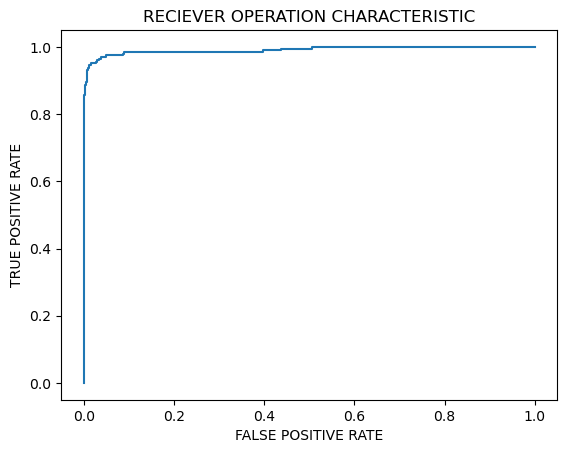

In [49]:
# roc curve 
plt.plot(FPR, TPR)
plt.xlabel('FALSE POSITIVE RATE')
plt.ylabel('TRUE POSITIVE RATE')
plt.title('RECIEVER OPERATION CHARACTERISTIC')
plt.show()

# CONCLUSION 

Since, we dont want Hams to be misclassified as spams (that is 0s should not be predicted as 1s so ,`high specificity` is required)<br>
The specificity is higher in bernoulli naive bayes than multinomial<br>
<b>Therefore , we choose BERNOULLI NAIVE BAYES model as per the business problem objective.